<a href="https://colab.research.google.com/github/ArunPrasath1205/Retail-Sales-Prediction-ML-Project/blob/main/Rossmann_Sales_Prediction_AP_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
sales_df = "/content/drive/MyDrive/Almabetter/Module 04 ML/Retail sales prediction ML project/Rossmann Stores Data.csv"
store_df = "/content/drive/MyDrive/Almabetter/Module 04 ML/Retail sales prediction ML project/store (1).csv"

In [9]:
sales_df = pd.read_csv(sales_df)
store_df = pd.read_csv(store_df)


In [10]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


* It should be note that, "school holiday" columns gives detail about the stores affected by the closure of the Public schools.
* Values count shows that, Most of the stores are not affected by the factor still there are good numbers.

In [15]:
sales_df["SchoolHoliday"].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [16]:
sales_df["Store"].value_counts()

1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: Store, Length: 1115, dtype: int64

* 

In [11]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


* Checking for the null values in the dataset information.
* In the sales dataset, we are fortunate enough to get the dataset with 0 null values in the features
* Total Rows = "1017209" and features ( columns ) = "9"

In [13]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


* In Store dataset, we provided with 1115 entires(rows) and 10 features 
* few features are come up with null value.
* Hence its important to process the null values in the dataset.

In [18]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [29]:
(round(store_df.isnull().sum()/(store_df.shape[0]),4)*100)

Store                         0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.27
CompetitionOpenSinceMonth    31.75
CompetitionOpenSinceYear     31.75
Promo2                        0.00
Promo2SinceWeek              48.79
Promo2SinceYear              48.79
PromoInterval                48.79
dtype: float64

* The Percentage of Null values in each feature in the sales dataset has been shown above.
* Feature CompetitionDistance with less than 1% null values
* It shows that features such as CompetitionOpenSinceMonth, CompetitionOpenSinceYear consists of around 30% null values.
* Promo2SinceYear, Promo2SinceWeek, PromoInterval are the features with the 50% of null values in respective entities.


Hence, we should deal with the null values by various methods before proceeding further.

## Dealing with Null values

### Treating Null values on feature "CompetitionDistance"

* As we already known that "CompetitionDistance" is the distance in meters to the nearest competitors.
* Hence distance of each store from the competitor will be seen using **"Distribution Plot"**

Text(0, 0.5, 'Distance from the Competitors')

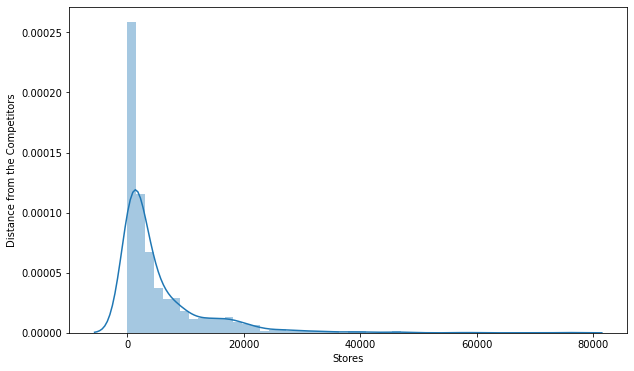

In [37]:
plt.subplots(figsize=(10, 6))
sns.distplot(x = store_df["CompetitionDistance"])
plt.xlabel("Stores")
plt.ylabel("Distance from the Competitors")


* General Question raises here is, What measure of central tendency should we take?
* Since the Distribution has been positively skewed.
* There is posibility of the **outliers**
* Hence, it's better to choose **"Median"** to measure the central tendency of this feature.

In [38]:
store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median(), inplace = True)

In [40]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Treating the null values on features "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear"

In [42]:
store_df["CompetitionOpenSinceMonth"].value_counts()

9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: CompetitionOpenSinceMonth, dtype: int64

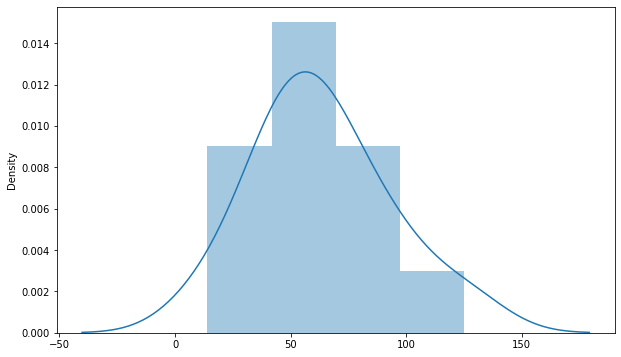

In [43]:
plt.subplots(figsize=(10, 6))
sns.distplot(x = store_df["CompetitionOpenSinceMonth"].value_counts())

In [53]:
store_df["CompetitionOpenSinceYear"].value_counts()

2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2009.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1961.0     1
1900.0     1
1998.0     1
Name: CompetitionOpenSinceYear, dtype: int64

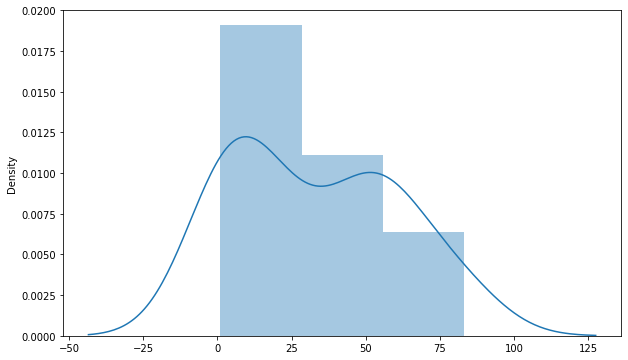

In [52]:
plt.subplots(figsize=(10, 6))
sns.distplot(x = store_df["CompetitionOpenSinceYear"].value_counts())

* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Considering the Above two distribution, I choose to impute the null values by calcuating the **"Mean"** as the central tendency measure for both this features.
* Also we simply say, competition for the stores in general are peak for few and low for very few stores.
* Hence we dealing with the mean values for treating the null.

In [56]:
store_df["CompetitionOpenSinceMonth"].fillna(round(store_df["CompetitionOpenSinceMonth"].mean()), inplace =True)
store_df["CompetitionOpenSinceYear"].fillna(round(store_df["CompetitionOpenSinceYear"].mean()), inplace =True)

In [57]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Treating null values for Promotions

* For other three features, we just replacing the null values by "0"
* Assuming the if the Promotion since detail not given, then we considering there is no promotions in the store.

In [58]:
store_df["Promo2SinceWeek"].fillna(value = 0 , inplace = True)
store_df["Promo2SinceYear"].fillna(value = 0 , inplace = True)
store_df["PromoInterval"].fillna(value = 0 , inplace = True)

In [60]:
(round(store_df.isnull().sum()/(store_df.shape[0]),4)*100)

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

* Hence, Both the dataset has been cleaned without null values in the entities of the features
* we shall now proceed for the merging of the two dataset

##Merging of Two Source Dataset

In [61]:
df = sales_df.merge(right = store_df, on= "Store", how = "left")  

In [62]:
df.shape

(1017209, 18)

In [64]:
df.head().T

,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31,2015-07-31,2015-07-31,2015-07-31,2015-07-31
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
StoreType,c,a,a,c,a
